In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
def load_data(filename):
    df = os.path.join('data', filename)
    df = pd.read_csv(df, sep=";")
    return df

In [3]:
df_red = load_data("winequality-red.csv")
df_white = load_data("winequality-white.csv")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_white['is_red'] = 0
df_red['is_red'] = 1

df_white.shape, df_red.shape

((4898, 13), (1599, 13))

In [6]:
df_white.drop_duplicates(keep='first')
df_red.drop_duplicates(keep='first')

df_white.shape, df_red.shape

((4898, 13), (1599, 13))

In [7]:
df = pd.concat([df_red, df_white], ignore_index=True)
df.shape

(6497, 13)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


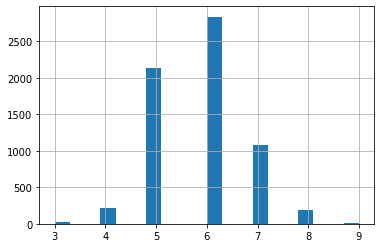

In [9]:
df['quality'].hist(bins=20)
plt.show()

In [10]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [11]:
# df = df[(df['quality']>4) & (df['quality']<8)]
# df = df.reset_index(drop=True)
# df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [11]:

conditions = [(df['quality'] <= 5),
            (df['quality'] >= 7)]
rating = [0, 2]

df['rating'] = np.select(condlist=conditions, choicelist=rating, default= 1)
df['rating'].value_counts()


df.drop(columns='quality', inplace=True)

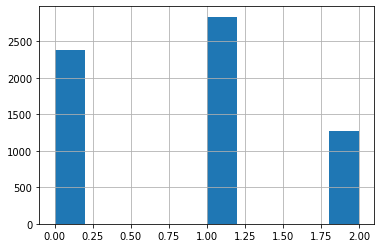

In [12]:
df['rating'].hist()
plt.show()


In [15]:
# Splitting data into train , validation and test

train, test = train_test_split(df, test_size=0.2, random_state=23, stratify=df['rating'])

# Validation split
train, val = train_test_split(train, test_size=0.2, random_state=23)

In [16]:
train['quality'].dtype

dtype('int64')

In [16]:
def get_labels(data, target):
    """
    returns labels from dataset
    """
    wine_quality = data[target].copy()
    wine_type = data['is_red'].copy()
    wine_quality = np.array(wine_quality)
    #wine_quality = np.reshape(wine_quality, (wine_quality.shape[0], 1))
    wine_quality = tf.one_hot(wine_quality, 3).numpy()
    wine_type = np.array(wine_type)
    

    return wine_quality, wine_type

In [17]:
def separation(data_df, target):
    y = get_labels(data_df, target=target)
    x = data_df.drop(columns=['is_red', target])
    return x, y

In [18]:
feature = 'rating'
train_x, train_y = separation(train, feature)
val_x, val_y = separation(val, feature)
test_x, test_y = separation(test, feature)

2022-01-31 18:41:45.247149: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
train_x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,7.204234,0.339915,0.318383,5.458672,0.055771,30.320183,115.435170,0.994696,3.220693,0.531997,10.497768
std,1.286394,0.164454,0.146290,4.832761,0.034433,17.384697,57.033301,0.003049,0.163674,0.149015,1.195920
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,76.000000,0.992300,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000
75%,7.700000,0.410000,0.390000,8.200000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000
max,15.600000,1.580000,1.660000,65.800000,0.611000,146.500000,366.500000,1.038980,4.010000,1.980000,14.200000


In [20]:
train_y[0].shape

(4157, 3)

In [21]:
norm = StandardScaler()
norm.fit(train_x)
norm_train = norm.transform(train_x)
norm_val = norm.transform(val_x)
norm_test = norm.transform(test_x)

In [91]:
def base_model(inputs):
    x = Dense(units=100, activation=tf.nn.relu)(inputs)
    x = Dense(units=100, activation=tf.nn.relu)(x)
    x = Dense(units=50, activation=tf.nn.relu)(x)
    return x

def main_model(inputs):
    x = base_model(inputs)
    xx = Dense(units=50, activation=tf.nn.relu)(x)
    #xx = keras.layers.Dropout(rate=0.1)(xx)
    #xx = Dense(units=25, activation=tf.nn.relu)(xx)
    #xx = keras.layers.Dropout(rate=0.1)(xx)
    wine_quality = Dense(units=3, activation=tf.nn.softmax, name='wine_quality')(xx)
    wine_type = Dense(units=1, activation=tf.nn.sigmoid, name='wine_type')(x)
    model_1 = Model(inputs=inputs, outputs=[wine_quality, wine_type])
    return model_1



In [92]:
# def base_model(inputs):
#     x = Dense(units=100, activation=tf.nn.relu)(inputs)
#     x = Dense(units=100, activation=tf.nn.relu)(x)
#     x = Dense(units=50, activation=tf.nn.relu)(x)
#     return x

# def main_model(inputs):
#     x = base_model(inputs)
#     wine_quality = Dense(units=4, activation=tf.nn.softmax, name='wine_quality')(x)
#     #wine_type = Dense(units=1, activation=tf.nn.sigmoid, name='wine_type')(x)
#     model_1 = Model(inputs=inputs, outputs=[wine_quality])
#     return model_1

In [93]:
inputs = Input(shape=[11])
model_1 = main_model(inputs)

In [94]:
train_y[0].shape, train_y[1].shape

((4157, 3), (4157,))

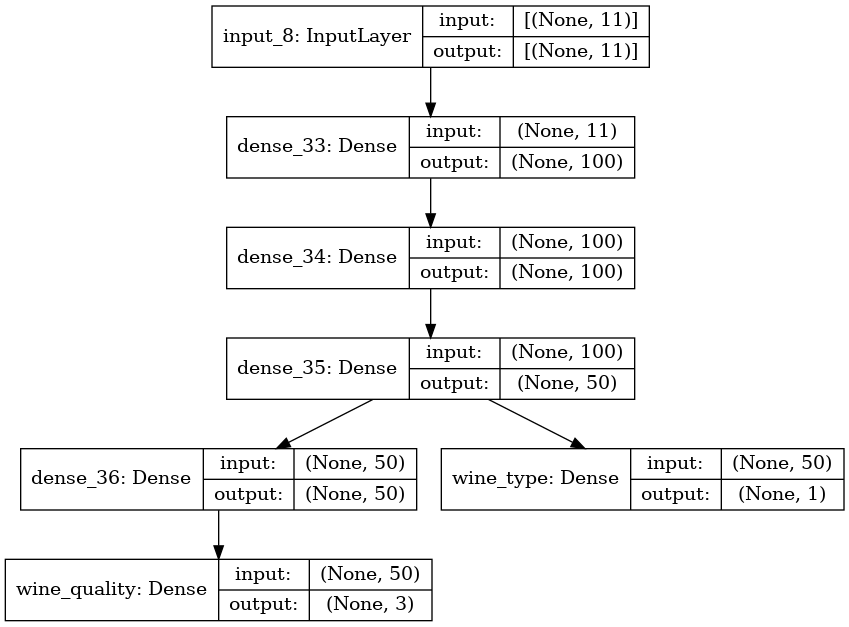

In [95]:
keras.utils.plot_model(model=model_1, show_shapes=True)


In [96]:
model_1.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 11)]         0                                            
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 100)          1200        input_8[0][0]                    
__________________________________________________________________________________________________
dense_34 (Dense)                (None, 100)          10100       dense_33[0][0]                   
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 50)           5050        dense_34[0][0]                   
____________________________________________________________________________________________

In [97]:
model_1.compile(loss={"wine_quality": "categorical_crossentropy",
                        "wine_type": "binary_crossentropy"},
                optimizer=keras.optimizers.RMSprop(),
                metrics={'wine_quality': 'accuracy',
                            'wine_type': 'accuracy'})

In [98]:
# model_1.compile(loss='sparse_categorical_crossentropy',
#                 optimizer=keras.optimizers.Adam(),
#                 metrics=['accuracy'])

In [99]:
history = model_1.fit(x=norm_train, y=train_y, validation_data=(norm_val, val_y),
                        epochs=150)

Epoch 1/150
130/130 [==============================] - 2s 5ms/step - loss: 1.0221 - wine_quality_loss: 0.9064 - wine_type_loss: 0.1157 - wine_quality_accuracy: 0.5487 - wine_type_accuracy: 0.9707 - val_loss: 0.8456 - val_wine_quality_loss: 0.8157 - val_wine_type_loss: 0.0299 - val_wine_quality_accuracy: 0.6260 - val_wine_type_accuracy: 0.9952
Epoch 2/150
130/130 [==============================] - 0s 3ms/step - loss: 0.8915 - wine_quality_loss: 0.8543 - wine_type_loss: 0.0372 - wine_quality_accuracy: 0.5843 - wine_type_accuracy: 0.9928 - val_loss: 0.8230 - val_wine_quality_loss: 0.7984 - val_wine_type_loss: 0.0246 - val_wine_quality_accuracy: 0.6298 - val_wine_type_accuracy: 0.9952
Epoch 3/150
130/130 [==============================] - 0s 4ms/step - loss: 0.8670 - wine_quality_loss: 0.8368 - wine_type_loss: 0.0302 - wine_quality_accuracy: 0.5853 - wine_type_accuracy: 0.9947 - val_loss: 0.8219 - val_wine_quality_loss: 0.8027 - val_wine_type_loss: 0.0192 - val_wine_quality_accuracy: 0.615

In [33]:
model_1.evaluate(norm_val, val_y)

33/33 [==============================] - 0s 2ms/step - loss: 2.6852 - wine_quality_loss: 2.6462 - wine_type_loss: 0.0390 - wine_quality_accuracy: 0.6625 - wine_type_accuracy: 0.9971


[2.685164451599121,
 2.646155834197998,
 0.03900826349854469,
 0.6625000238418579,
 0.9971153736114502]

In [34]:
loss, wq_loss, wt_loss, wq_acc, wt_acc = model_1.evaluate(norm_test, test_y)

print("\n")
print(f"Overall loss: {loss}, \nWine Quality Loss: {wq_loss}, \nWine Type Loss: {wt_loss}")
print(f"Wine Quality Accuracy; {round(wq_acc*100, 2)}, \nWine Type Accuracy: {round(wt_acc*100, 2)}")

41/41 [==============================] - 0s 2ms/step - loss: 2.9232 - wine_quality_loss: 2.8702 - wine_type_loss: 0.0530 - wine_quality_accuracy: 0.6638 - wine_type_accuracy: 0.9946


Overall loss: 2.923177480697632, 
Wine Quality Loss: 2.8701720237731934, 
Wine Type Loss: 0.05300595611333847
Wine Quality Accuracy; 66.38, 
Wine Type Accuracy: 99.46


In [35]:
model_1.predict(norm_test[0:5])

[array([[9.9735731e-01, 2.6426807e-03, 7.2026320e-15],
        [9.9996722e-01, 3.2810192e-05, 2.3581655e-32],
        [2.3024200e-05, 9.9997699e-01, 2.1288882e-30],
        [1.0000000e+00, 4.6586006e-08, 1.9534689e-12],
        [6.7990147e-09, 9.3033868e-01, 6.9661357e-02]], dtype=float32),
 array([[7.2529730e-14],
        [1.0000000e+00],
        [1.4221048e-31],
        [1.8856076e-16],
        [1.8921806e-05]], dtype=float32)]

In [36]:
test_y[0][0:5], test_y[1][0:5]

(array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 array([0, 1, 0, 0, 0]))